# Homework5: Wasserstein GAN

**Солоднёва Катя**

## Task 1: Theory (4pt)

### Problem 1: Importance weighted dequantization (1pt)
Let's recall the variational lower bound for the discrete data dequantization from Lecture 7:
$$
    \log P(\mathbf{y} | \boldsymbol{\theta}) \geq  \int q(\mathbf{u} | \mathbf{y}) \log \frac{p(\mathbf{y} + \mathbf{u} | \boldsymbol{\theta})}{q(\mathbf{u} | \mathbf{y})} d \mathbf{u} = \mathcal{L}(q, \boldsymbol{\theta}).
$$
Previously we have discussed (Lecture 4, IWAE) that the variational lower bound can be improved with the help of Importance Sampling technique. Write out the lower bound for dequantization using $\mathcal{L}_k$ by analogy with the IWAE model.


Let define
$$
\begin{gathered}
f\left(\mathbf{y}, \mathbf{u}_1, \ldots, \mathbf{u}_K\right)=\frac{1}{K} \sum_{k=1}^K \frac{p\left(\mathbf{y}+ \mathbf{u}_k \mid \boldsymbol{\theta}\right)}{q\left(\mathbf{u}_k \mid \mathbf{y}\right)} \\
\mathbb{E}_{\mathbf{u}_1, \ldots, \mathbf{u}_K \sim q(\mathbf{u} \mid \mathbf{y})} f\left(\mathbf{y}, \mathbf{u}_1, \ldots, \mathbf{u}_K\right)=p(\mathbf{y} \mid \boldsymbol{\theta})
\end{gathered}
$$
ELBO
$$
\begin{aligned}
\log p(\mathbf{y} \mid \boldsymbol{\theta}) &=\log \mathbb{E}_{\mathbf{u}_1, \ldots, \mathbf{u}_K \sim q(\mathbf{u} \mid \mathbf{x})} f\left(\mathbf{y}, \mathbf{u}_1, \ldots, \mathbf{u}_K\right) \geq \text{(Jensen inequality)}\geq \\
& \geq \mathbb{E}_{\mathbf{u}_1, \ldots, \mathbf{u}_K \sim q(\mathbf{u} \mid \mathbf{y})} \log f\left(\mathbf{y}, \mathbf{u}_1, \ldots, \mathbf{u}_K\right)=\\
=& \mathbb{E}_{\mathbf{u}_1, \ldots, \mathbf{u}_K \sim q(\mathbf{u} \mid \mathbf{y})} \log \left[\frac{1}{K} \sum_{k=1}^K \frac{p\left(\mathbf{y}+ \mathbf{u}_k \mid \boldsymbol{\theta}\right)}{q\left(\mathbf{u}_k \mid \mathbf{y}\right)}\right]=\mathcal{L}_K(q, \boldsymbol{\theta}) .
\end{aligned}
$$

### Problem 2: Least Squares GAN (1pt)
    
The Vanilla GAN often suffers from problems with a vanishing gradient. [Least Squares GAN](https://arxiv.org/abs/1611.04076) tries to solve this problem by replacing the error function with the following:
$$
   	\min_D V(D) = \min_D \frac{1}{2}\left[ \mathbb{E}_{\pi(\mathbf{x})} (D(\mathbf{x}) - b)^2 + \mathbb{E}_{p(\mathbf{z})} (D(G(\mathbf{z})) - a)^2 \right]
$$
$$
   	\min_G V(G) = \min_G \frac{1}{2}\left[ \mathbb{E}_{\pi(\mathbf{x})} (D(\mathbf{x}) - c)^2 + \mathbb{E}_{p(\mathbf{z})} (D(G(\mathbf{z})) - c)^2 \right],
$$
where $a,b,c \in \mathbb{R}$ some fixed constants.

1) Write out the formula for the optimal discriminator $D^*$.
  
2) Write out the expression for the error function of the generator $V(G)$ in the case of an optimal discriminator $D^*$.
  
3) Prove that for $b - c = 1$, $b - a = 2$, the error function of the generator $V(G)$ in the case of the optimal discriminator $D^*$ takes the form:
$$
   	V(G) = \chi^2_{\text{Pearson}} \left(\frac{\pi(\mathbf{x}) + p(\mathbf{x} | \boldsymbol{\theta})}{2} || p(\mathbf{x} | \boldsymbol{\theta})\right), 
$$
where $\chi^2_{\text{Pearson}} (p || q)$ is a squared Pearson divergence:
$$
   	\chi^2_{\text{Pearson}} (p || q) = \int \frac{(p(\mathbf{x}) - q(\mathbf{x}))^2}{p(\mathbf{x})} d \mathbf{x}.
$$




$$\boldsymbol{1}.\quad
   	\min_D V(D) = \min_D \frac{1}{2}\left[ \mathbb{E}_{\pi(\mathbf{x})} (D(\mathbf{x}) - b)^2 + \mathbb{E}_{p(\mathbf{z})} (D(G(\mathbf{z})) - a)^2 \right] =  \min_D \frac{1}{2} \int \underbrace{\left[ {\pi(\mathbf{x})} (D(\mathbf{x}) - b)^2 + {p(\mathbf{x}\mid \boldsymbol{\theta})} (D(x) - a)^2 \right]}_{\frac{1}{2}y(D)} d\mathbf{x} 
$$
$$
\frac{dy}{dD} = {\pi(\mathbf{x})}(D^*(\mathbf{x}) - b) + p(\mathbf{x}\mid \boldsymbol{\theta}) (D^*(x) - a) = 0 ⟹ D^*(\mathbf{x}) (\pi(\mathbf{x})+p(\mathbf{x}\mid \boldsymbol{\theta})) - a\cdot p(\mathbf{x}\mid \boldsymbol{\theta}) - b\cdot \pi(\mathbf{x}) = 0 \quad ⟹ D^* = \frac{a\cdot p(\mathbf{x}\mid \boldsymbol{\theta}) + b\cdot \pi(\mathbf{x})}{\pi(\mathbf{x})+p(\mathbf{x}\mid \boldsymbol{\theta})}
$$

$$\boldsymbol{2}.\quad
   	\min_G V(G) = \min_G \frac{1}{2}\left[ \mathbb{E}_{\pi(\mathbf{x})} (D(\mathbf{x}) - c)^2 + \mathbb{E}_{p(\mathbf{z})} (D(G(\mathbf{z})) - c)^2 \right] = \quad=\min_G \frac{1}{2}\left[\mathbb{E}_{\pi(\mathbf{x})}\frac{(a-c)\cdot p(\mathbf{x}\mid \boldsymbol{\theta}) + (b-c)\cdot \pi(\mathbf{x})}{\pi(\mathbf{x})+p(\mathbf{x}\mid \boldsymbol{\theta})}+\mathbb{E}_{p(\mathbf{z})}\frac{(a-c)\cdot p(\mathbf{x}\mid \boldsymbol{\theta}) + (b-c)\cdot \pi(\mathbf{x})}{\pi(\mathbf{x})+p(\mathbf{x}\mid \boldsymbol{\theta})} \right]
$$

 $\boldsymbol{3}.\quad b-c = 1,\quad b-a = 2 ⟹ a-c = -1$

$$
\min_G V(G) = \min_G \frac{1}{2}\left[\mathbb{E}_{\pi(\mathbf{x})}\frac{(a-c)\cdot p(\mathbf{x}\mid \boldsymbol{\theta}) + (b-c)\cdot \pi(\mathbf{x})}{\pi(\mathbf{x})+p(\mathbf{x}\mid \boldsymbol{\theta})}+\mathbb{E}_{p(\mathbf{z})}\frac{(a-c)\cdot p(\mathbf{x}\mid \boldsymbol{\theta}) + (b-c)\cdot \pi(\mathbf{x})}{\pi(\mathbf{x})+p(\mathbf{x}\mid \boldsymbol{\theta})} \right] = \min_G \frac{1}{2}\left[\mathbb{E}_{\pi(\mathbf{x})}\left(\frac{\pi(\mathbf{x})- p(\mathbf{x}\mid \boldsymbol{\theta})}{\pi(\mathbf{x})+p(\mathbf{x}\mid \boldsymbol{\theta})}\right)^2+\mathbb{E}_{p(\mathbf{x}\mid \boldsymbol{\theta})}\left(\frac{\pi(\mathbf{x})- p(\mathbf{x}\mid \boldsymbol{\theta})}{\pi(\mathbf{x})+p(\mathbf{x}\mid \boldsymbol{\theta})}\right)^2 \right] = \frac{1}{2}\int\left(\pi(\mathbf{x})+p(\mathbf{x}\mid \boldsymbol{\theta})\right)\left(\frac{\pi(\mathbf{x})- p(\mathbf{x}\mid \boldsymbol{\theta})}{\pi(\mathbf{x})+p(\mathbf{x}\mid \boldsymbol{\theta})}\right)^2d \mathbf{x} = \quad \frac{1}{2}\int\frac{(\pi(\mathbf{x})- p(\mathbf{x}\mid \boldsymbol{\theta}))^2}{\pi(\mathbf{x})+p(\mathbf{x}\mid \boldsymbol{\theta})}d \mathbf{x} = \int\frac{\frac{(\pi(\mathbf{x})- p(\mathbf{x}\mid \boldsymbol{\theta}))^2}{4}}{\frac{\pi(\mathbf{x})+p(\mathbf{x}\mid \boldsymbol{\theta})}{2}}d \mathbf{x} =  ⭐️
$$

$$
\left(\frac{\pi(\mathbf{x})+p(\mathbf{x}\mid \boldsymbol{\theta})}{2} - p(\mathbf{x}\mid \boldsymbol{\theta})\right)^2 = \frac{(\pi(\mathbf{x})-p(\mathbf{x}\mid \boldsymbol{\theta}))^2}{4}
$$

$$
⭐️ = \chi^2_{\text{Pearson}} \left(\frac{\pi(\mathbf{x}) + p(\mathbf{x} | \boldsymbol{\theta})}{2} || p(\mathbf{x} | \boldsymbol{\theta})\right)
$$

### Problem 3: Gradient Penalty theorem (2pt)

In this problem your task is to partially validate the **Gradient Penalty** theorem (*similar to* [WGAN-GP](https://arxiv.org/pdf/1704.00028.pdf), *proposition 1*) from the Lecture 10. 

Recall the Waserstein GAN theoretical setup. Let $\pi$ and $p$ are two probability measures defined on $\mathbb{R}^m$. The primal and Kantorovich-Rubinstein (dual) formulations of $1$-Wasserstein distance are as follows:

$$
W(\pi \Vert p) = \inf\limits_{\gamma \in \Gamma(\pi, p)} \int \Vert \mathbf{y} - \mathbf{z} \Vert \gamma(\mathbf{y}, \mathbf{z}) d\mathbf{y} d\mathbf{z}\quad \text{(primal problem)}
$$

$$
W(\pi \Vert p) = \sup\limits_{\Vert f \Vert_L \leq 1} \left[ \int f(\mathbf{x}) \pi(\mathbf{x}) d\mathbf{x} - \int f(\mathbf{x}) p(\mathbf{x}) d\mathbf{x}\right] \quad \text{(dual problem)}
$$

Let there exist $\gamma^* \in \arg\inf\limits_{\gamma \in \Gamma(\pi, p)} \int \Vert \mathbf{y} - \mathbf{z} \Vert \gamma(\mathbf{y}, \mathbf{z}) d\mathbf{y} d\mathbf{z}$ and $f^* \in \arg\sup\limits_{\Vert f \Vert_L \leq 1} \left[ \int f(\mathbf{x}) \pi(\mathbf{x}) d\mathbf{x} - \int f(\mathbf{x}) p(\mathbf{x}) d\mathbf{x}\right]$.

Let $f^*$ is differentiable, $\gamma^*(\{ \mathbf{y} = \mathbf{z}\}) = 0$. Let $t \in [0, 1]$. Prove, that $\mathbb{P}_{(\mathbf{y}, \mathbf{z}) \sim \gamma^*} \left[\Vert \nabla f^*(\mathbf{x})\big{|}_{\mathbf{x} = t \mathbf{y} + (1 - t)\mathbf{z}}\Vert = 1
\right]= 1$.

In this task we suppose, that the norm $\Vert \cdot \Vert$  is the standard euclidean norm. I.e. $\Vert \mathbf{y} - \mathbf{z} \Vert = \sqrt{\langle \mathbf{y} - \mathbf{z}, \mathbf{y} - \mathbf{z} \rangle}$. The $\langle \cdot , \cdot \rangle$ is standard scalar product.

**Hint 1**: Use the statement from the Seminar 10: 
$$
\mathbb{P}_{(\mathbf{y}, \mathbf{z}) \sim \gamma^*} \left[f^*(\mathbf{y}) - f^*(\mathbf{z}) = \Vert \mathbf{y} - \mathbf{z} \Vert\right] = 1.
$$

**Hint 2**: Note, that $f^*$ is 1-Lipshitz.

1. Let $(\mathbf{y}, \mathbf{z}) \sim \gamma^*$. Given $t \in [0, 1]$ define $\mathbf{x}_t = t \mathbf{y} + (1 - t)\mathbf{z}$. Prove, that 
$$
\mathbb{P}_{(\mathbf{y}, \mathbf{z}) \sim \gamma^*} \Big{[}\sup\limits_{t \in [0, 1]} \big{|} f^*(\mathbf{x}_t) - f^*(\mathbf{z}) - t \Vert \mathbf{y} - \mathbf{z} \Vert\big{|} = 0\Big{]} = 1.
$$

2. Let $(\mathbf{y}, \mathbf{z}) \sim \gamma^*$. Define the function $\phi(t) : [0, 1] \rightarrow \mathbb{R}$, $\phi(t) = f^*(x_t)$. By considering $\nabla_t \phi(t)$ prove, that:
$$
\forall t \in [0, 1] \text{ : }\mathbb{P}_{(\mathbf{y}, \mathbf{z}) \sim \gamma^*} \big{[}\langle \nabla f^*(\mathbf{x})\big{|}_{\mathbf{x} = \mathbf{x}_t}, \mathbf{y} - \mathbf{z}\rangle = \Vert \mathbf{y} - \mathbf{z} \Vert\big{]} = 1.
$$

3. Prove, that $\forall t \in [0, 1]$: 
$$
\mathbb{P}_{(\mathbf{y}, \mathbf{z}) \sim \gamma^*} \big{[}\nabla f^*(\mathbf{x})\big{|}_{\mathbf{x} = \mathbf{x}_t} = \frac{\mathbf{y} - \mathbf{z}}{\Vert \mathbf{y} - \mathbf{z} \Vert}\big{]} = 1.
$$

$$
\boldsymbol{1}.\quad f^*(\mathbf{x}_t) - f^*(\mathbf{z}) \leq \Vert t\mathbf{y} +(1-t)\mathbf{z}- \mathbf{z} \Vert   = t \Vert \mathbf{y} - \mathbf{z} \Vert  
$$
(неравенство в силу 1-Липшицевости)

(там вообще модуль должен быть для Липшицевости, но тогда для неотрицательного выражения $|f^*(\mathbf{x}_t) - f^*(\mathbf{z})|$ получим верхнюю границу из липшецевости, а для противоположного, $-|f^*(\mathbf{x}_t) - f^*(\mathbf{z})|$, верхняя граница равна 0 и достигается при t=0, так что тоже верно.)

$$
\boldsymbol{2}. 1) \phi(t) - \phi(0) = f^*(\mathbf{x}_t) - f^*(\mathbf{z}) \leq t \Vert \mathbf{y} - \mathbf{z} \Vert,\quad \text{аналогично}\quad \phi(1) - \phi(1-t) = f^*(\mathbf{y}) - f^*(\mathbf{x}_{1-t}) \leq (1-t) \Vert \mathbf{y} - \mathbf{z} \Vert
$$
$$
2) \text{Hint 1}\Longrightarrow f^*(\mathbf{y}) - f^*(\mathbf{z}) = \Vert \mathbf{y} - \mathbf{z} \Vert,\quad f^*(\mathbf{y}) - f^*(\mathbf{z}) = \phi(1)-\phi(0) ⟹ \phi(1)-\phi(0)=\Vert \mathbf{y} - \mathbf{z} \Vert
$$

Выразим $\phi(t)$ через 1), 2):  $\Vert \mathbf{y} - \mathbf{z}\Vert=\phi(1) - \phi(1-t) + \phi(t) - \phi(0) \leq t \Vert \mathbf{y} - \mathbf{z}\Vert + (1-t) \Vert \mathbf{y} - \mathbf{z} \Vert = \Vert \mathbf{y} - \mathbf{z}\Vert$, а значит неравенство превращается в равенство, а $\phi(t) =  t \Vert \mathbf{y} - \mathbf{z}\Vert + \phi(0),\quad⟹ \nabla_t \phi(t) = \Vert \mathbf{y} - \mathbf{z}\Vert$

Заметим, что из производной сложной функции следует $\nabla_t \phi(t)  =\langle\nabla f^*(\mathbf{x})\big{|}_{\mathbf{x} =  \mathbf{x}_t} , \nabla_t \mathbf{x}_t\rangle=\langle\nabla f^*(\mathbf{x})\big{|}_{\mathbf{x} = \mathbf{x}_t}, (\mathbf{y} - \mathbf{z})\rangle,\quad \nabla_t \phi(t) = \Vert \mathbf{y} - \mathbf{z}\Vert \Longrightarrow  \langle \nabla f^*(\mathbf{x})\big{|}_{\mathbf{x} = \mathbf{x}_t}, \mathbf{y} - \mathbf{z}\rangle =\Vert \mathbf{y} - \mathbf{z}\Vert $

$$
\boldsymbol{3}. \langle f^*(\mathbf{x})\big{|}_{\mathbf{x} =  \mathbf{x}_t}-  \frac{\mathbf{y} - \mathbf{z}}{\Vert \mathbf{y} - \mathbf{z} \Vert}, \mathbf{y} - \mathbf{z}  \rangle = \langle f^*(\mathbf{x})\big{|}_{\mathbf{x} =  \mathbf{x}_t}, \mathbf{y} - \mathbf{z}  \rangle - \langle  \frac{\mathbf{y} - \mathbf{z}}{\Vert \mathbf{y} - \mathbf{z} \Vert}, \mathbf{y} - \mathbf{z}  \rangle = \Vert \mathbf{y} - \mathbf{z} \Vert - \frac{\Vert \mathbf{y} - \mathbf{z} \Vert^2}{\Vert \mathbf{y} - \mathbf{z} \Vert} = \Vert \mathbf{y} - \mathbf{z} \Vert - \Vert \mathbf{y} - \mathbf{z} \Vert = 0 ⟹\text{т.к.}\quad \mathbf{y}\neq \mathbf{z}, \quad \mathbf{y} - \mathbf{z} \neq 0, \quad f^*(\mathbf{x})\big{|}_{\mathbf{x} =  \mathbf{x}_t} = \frac{\mathbf{y} - \mathbf{z}}{\Vert \mathbf{y} - \mathbf{z} \Vert}
$$

In [1]:
REPO_NAME = "2022-2023-DGM-AIMasters-course"
!if [ -d {REPO_NAME} ]; then rm -Rf {REPO_NAME}; fi
!git clone https://github.com/r-isachenko/{REPO_NAME}.git
!cd {REPO_NAME}
!pip install ./{REPO_NAME}/homeworks/
!rm -Rf {REPO_NAME}

Cloning into '2022-2023-DGM-AIMasters-course'...
remote: Enumerating objects: 1193, done.
remote: Counting objects: 100% (157/157), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 1193 (delta 56), reused 153 (delta 53), pack-reused 1036
Receiving objects: 100% (1193/1193), 551.68 MiB | 28.08 MiB/s, done.
Resolving deltas: 100% (459/459), done.
Updating files: 100% (400/400), done.
Processing ./2022-2023-DGM-AIMasters-course/homeworks
  Preparing metadata (setup.py) ... done
  Created wheel for dgm-utils: filename=dgm_utils-0.1.0-py3-none-any.whl size=3616 sha256=e53dd0763d69e1037830fa2175f7a88841aedcfe26e70cd519f2347a776b7f07
  Stored in directory: /tmp/pip-ephem-wheel-cache-zzp2cklf/wheels/01/03/33/04a3cd9fc7a8852c8110e1632ece2353feecb3e230cdd3b814
Successfully built dgm-utils


In [2]:
from dgm_utils import show_samples, visualize_images, load_pickle 

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum
from functools import partial
from tqdm.notebook import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

USE_CUDA = torch.cuda.is_available()

print('cuda is available:', USE_CUDA)

cuda is available: True


In [4]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [4]:
# do not change this function
def plot_losses(losses, title):
    n_itr = len(losses)
    xs = np.arange(n_itr)

    plt.figure(figsize=(7, 5))
    plt.plot(xs, losses)
    plt.title(title, fontsize=14)
    plt.xlabel('Iterations', fontsize=14)
    plt.ylabel('Loss', fontsize=14)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

## Task 2: Wasserstein GANs for CIFAR 10 (9pt)

In this task you will fit different kinds of Wasserstein GANs (different ways to enforce Lipschitzness) that we discussed in the Lectures 9 and 10 to the CIFAR10 dataset
* [WGAN](https://arxiv.org/abs/1701.07875) - standard Wasserstein GAN with weight clipping;
* [WGAN-GP](https://arxiv.org/pdf/1704.00028.pdf) - Wasserstein GAN with Gradient Penalty;
* [SN-GAN](https://arxiv.org/pdf/1802.05957.pdf) - Wasserstein GAN with Spectral Normalization.


Download the data from [here](https://drive.google.com/file/d/1FZcV8Mm91fiXm2jFnB0jvK5ROyHdJFvj/view?usp=sharing) (you could use the cell below).

In [5]:
!gdown --id 1FZcV8Mm91fiXm2jFnB0jvK5ROyHdJFvj

/opt/conda/lib/python3.7/site-packages/gdown/cli.py:125: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1FZcV8Mm91fiXm2jFnB0jvK5ROyHdJFvj
To: /kaggle/working/cifar10.pkl
100%|█████████████████████████████████████████| 185M/185M [00:00<00:00, 217MB/s]


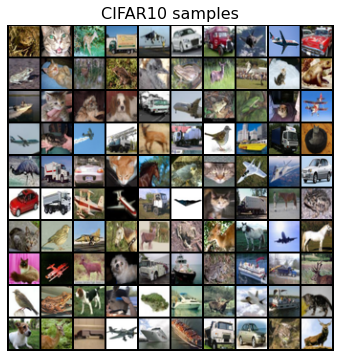

In [6]:
#train_data, test_data = load_pickle('/content/cifar10.pkl')
train_data, test_data = load_pickle('/kaggle/input/cifar10/cifar10.pkl')

#train_data, test_data = load_pickle('/content/drive/MyDrive/DGM/homework_supplementary/cifar10.pkl')
visualize_images(train_data, 'CIFAR10 samples')

### Problem 1: WGAN (3pt)

[WGAN](https://arxiv.org/abs/1701.07875) model uses weight clipping to enforce Lipschitzness of the critic.

The model objective is
$$
\min_{G} W(\pi || p) \approx \min_{G} \max_{\boldsymbol{\phi} \in \boldsymbol{\Phi}} \left[ \mathbb{E}_{\pi(\mathbf{x})} f(\mathbf{x}, \boldsymbol{\phi})  - \mathbb{E}_{p(\mathbf{z})} f(G(\mathbf{z}, \boldsymbol{\theta}), \boldsymbol{\phi} )\right].
$$
Here $f(\mathbf{x}, \boldsymbol{\phi})$ is the critic model. The critic weights $\boldsymbol{\phi}$ should lie in the compact set $\boldsymbol{\Phi} = [-c, c]^d$.

In this task we will use fully-connected networks for the generator $G(\mathbf{z}, \boldsymbol{\theta})$ and the critic $f(\mathbf{x}, \boldsymbol{\phi})$.

Here we will use convolution-based generator and critic.

First of all, let define generator network. It will be the same for all WGAN models.

In [44]:
class ConvGenerator(nn.Module):
    def __init__(self, input_size=128, n_channels=64):
        super().__init__()
        self.n_channels = n_channels
        self.input_size = input_size
        # ====
        # your code
        # 1) define linear layer with output units 4 * 4 * 4 * n_channels, then relu
        # 2) define transposed conv with stride 2, kernel size 2 then BN, then relu
        # 3) define transposed conv with stride 2, kernel size 2 then BN, then relu

        # ====
        self.l1 = nn.Linear(self.input_size, 4 * 4 * 4 * n_channels)
        self.relu0 = nn.ReLU()
        self.block1 = nn.Sequential(
                            nn.Upsample(scale_factor = 2, mode='bilinear'),
                            nn.ReflectionPad2d(1),
                            nn.Conv2d(n_channels, n_channels,
                                                 kernel_size=3, stride=1, padding=0))
        self.convT1 = nn.ConvTranspose2d(in_channels = n_channels, out_channels= n_channels, kernel_size=2, stride=2)
        self.BN1 = nn.BatchNorm2d(num_features = n_channels)
        self.relu1 = nn.ReLU()
        
        self.block2 = nn.Sequential(
                            nn.Upsample(scale_factor = 2, mode='bilinear'),
                            nn.ReflectionPad2d(1),
                            nn.Conv2d(n_channels, 3,
                                                 kernel_size=3, stride=1, padding=0))
        
        self.convT2 = nn.ConvTranspose2d(in_channels = n_channels, out_channels= 3, 
                                         kernel_size=2, stride=2)
        self.BN2 = nn.BatchNorm2d(num_features = 3)
        self.relu2 = nn.ReLU()
        
        

    def forward(self, inp):
        # ====
        # your code
        # apply all layers
        # ====
        x = self.l1(inp)
        x = self.relu0(x)
        x = x.view(x.shape[0], self.n_channels, 8, 8)
        #x = self.convT1(x)
        x = self.block1(x)
        x = self.BN1(x)
        x = self.relu1(x)
        x = self.block2(x)
        #x = self.convT2(x)
        x = self.BN2(x)
        output = self.relu2(x)
        return output.view(-1, 3, 32, 32)

    def sample(self, n_samples):
        # ====
        # your code
        # sample from standard normal distribution and apply the model
        # ====
        prior = torch.distributions.Normal(torch.tensor(0.), torch.tensor(1.))
        s = prior.sample(sample_shape=torch.Size([n_samples, self.input_size])).cuda()
        out = self.forward(s)
        return out

Now it is time to define our critic. Here we will use the same class for all WGAN models, but the arguments will depend on the WGAN mode.

In [69]:
class ConvCritic(nn.Module):
    def __init__(self, n_channels, conv_layer=None, linear_layer=None, clip_c=None):
        super().__init__()
        self.n_channels = n_channels
        self.conv_layer = conv_layer or nn.Conv2d
        self.linear_layer = linear_layer or nn.Linear
        self.clip_c = clip_c
        
        # ====
        # your code
        # sequence of convolutional layers and LeakyRelU -> reshape -> FC
        # !Note:! use self.conv_layer and self.linear_layer 
        # (it is important for the SN-GAN model)
        # ====
        self.conv1 = self.conv_layer(3, n_channels, kernel_size=3, stride=2, padding=1)
        self.lrelu1 = nn.LeakyReLU(0.01)

        self.conv2 = self.conv_layer(n_channels, n_channels, kernel_size=3, stride=2, padding=1)
        self.lrelu2 = nn.LeakyReLU(0.02)
        
        self.conv3 = self.conv_layer(n_channels, n_channels, kernel_size=3, stride=2, padding=1)
        self.lrelu3 = nn.LeakyReLU(0.1)
        
        self.d = nn.Dropout() #
        self.f2 = nn.Flatten()
    
        self.l2 = self.linear_layer(1024, 1)
        
        
        
    def clip_weights(self):
        lay_list = [self.conv1, self.conv2, self.conv3, self.l2]
        for layer in lay_list:
            if isinstance(layer, nn.Linear) or isinstance(layer, nn.Conv2d):
                # ====
                # your code
                # clip the weight to the range [-clip_c, clip_c]
                # ====
                weight = torch.clamp(layer.weight.data, -self.clip_c, self.clip_c)
                layer.weight.data = weight

    def forward(self, x):
        # ====
        # your code
        # 1) clip the critic weights (if clip_c is given)
        # 2) apply all layers

        # ====
        if self.clip_c:
            self.clip_weights()
        x = self.conv1(x)
        x = self.lrelu1(x)
        x = self.conv2(x)
        x = self.lrelu2(x)
        x = self.conv3(x)
        x = self.lrelu3(x)
        x = self.f2(x)
        x = self.l2(x)
        output = self.d(x)
        return output

In [70]:
def train_wgan(
    generator, 
    critic, 
    train_loader,
    critic_steps, 
    batch_size,
    n_epochs,
    lr, 
    use_cuda=False,
    gp_weight=None
):

    if use_cuda:
        critic = critic.cuda()
        generator = generator.cuda()
    critic.train()
    generator.train()

    gen_optimizer = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0, 0.9))
    critic_optimizer = torch.optim.Adam(critic.parameters(), lr=lr, betas=(0, 0.9))

    curr_iter = 0
    d_loss, g_loss = torch.zeros(1), torch.zeros(1)
    batch_loss_history = {'discriminator_losses': [], 'generator_losses': []}
    for epoch_i in tqdm(range(n_epochs)):
        for batch_i, x in enumerate(train_loader):
            curr_iter += 1
            if use_cuda:
                x = x.cuda()

            # do a critic update
            critic_optimizer.zero_grad()
            fake_data = generator.sample(x.shape[0])
            # ====
            # your code
            # D(x_fake) - D(x_real)
            # ====
            d_loss = torch.sum(critic(fake_data) - critic(x))
            

            if gp_weight is not None:
                gp = gradient_penalty(critic, x, fake_data)
                d_loss += gp_weight * gp

            d_loss.backward()
            critic_optimizer.step()

            # generator update
            if curr_iter % critic_steps == 0:
                gen_optimizer.zero_grad()
                fake_data = generator.sample(batch_size)
                # ====
                # your code
                # -D(x_fake)

                # ====
                g_loss = -torch.sum(critic(fake_data))
                g_loss.backward()
                gen_optimizer.step()

                batch_loss_history['generator_losses'].append(g_loss.data.cpu().numpy())
                batch_loss_history['discriminator_losses'].append(d_loss.data.cpu().numpy())

    return batch_loss_history

  0%|          | 0/40 [00:00<?, ?it/s]

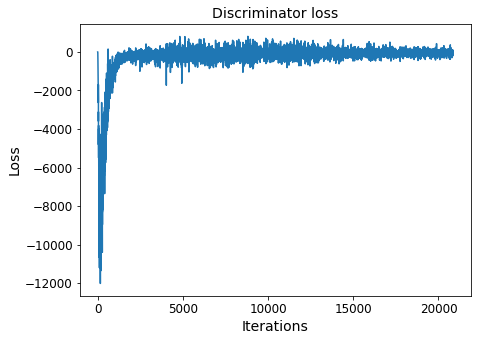

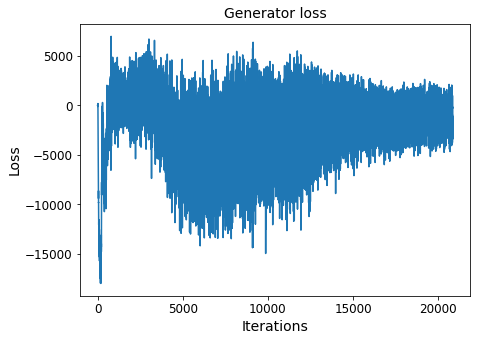

In [50]:
# ====
# your code
# choose these parameters (you have to train the model more than 20 epochs to get good results)
BATCH_SIZE = 32   # any adequate value
N_CHANNELS = 64   # > 32
N_EPOCHS = 40     # > 10
CRITIC_STEPS = 3 # > 2
CLIP_C = 0.05       # < 1
LR = 3e-4           # < 1e-3
# ====

train_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

generator = ConvGenerator(n_channels=N_CHANNELS)
critic = ConvCritic(n_channels=N_CHANNELS, clip_c=CLIP_C)

train_losses = train_wgan(
    generator, 
    critic, 
    train_loader,
    critic_steps=CRITIC_STEPS, 
    batch_size=BATCH_SIZE, 
    n_epochs=N_EPOCHS,
    lr=LR,
    use_cuda=USE_CUDA
)

plot_losses(train_losses['discriminator_losses'], 'Discriminator loss')
plot_losses(train_losses['generator_losses'], 'Generator loss')

Let sample from our model and draw the samples.

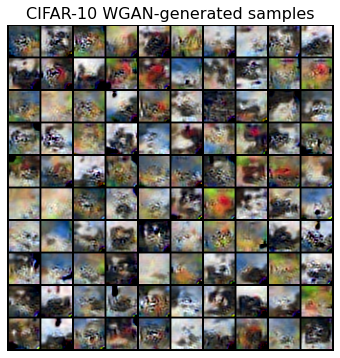

In [51]:
generator.eval()
critic.eval()
with torch.no_grad():
    samples = generator.sample(1000)
    samples = samples.cpu().detach().numpy()
    

show_samples(samples[:100], title='CIFAR-10 WGAN-generated samples')

### Problem 2: WGAN-GP for CIFAR 10 (3pt)

[WGAN-GP](https://arxiv.org/pdf/1704.00028.pdf)  model uses gradient penalty to enforce Lipschitzness.

The model objective is
$$
    W(\pi || p) = \underbrace{\mathbb{E}_{\pi(\mathbf{x})} f(\mathbf{x})  - \mathbb{E}_{p(\mathbf{x} | \boldsymbol{\theta})} f(\mathbf{x})}_{\text{original critic loss}} + \lambda \underbrace{\mathbb{E}_{U[0, 1]} \left[ \left( \| \nabla_{\hat{\mathbf{x}}} f(\hat{\mathbf{x}}) \|_2 - 1 \right) ^ 2\right]}_{\text{gradient penalty}},
$$
where the samples $\hat{\mathbf{x}}_t = t \mathbf{x} + (1 - t) \mathbf{y}$ with $t \in [0, 1]$ are uniformly sampled along straight lines between pairs of points: $\mathbf{x}$ from the data distribution $\pi(\mathbf{x})$ and $\mathbf{y}$ from the generator distribution $p(\mathbf{x} | \boldsymbol{\theta}))$.

Let define our gradient penalty loss.

In [63]:
def gradient_penalty(critic, real_data, fake_data):
    batch_size = real_data.shape[0]

    # ====
    # your code
    # Calculate interpolation x_t = t * x_real + (1 - t) x_fake
    # 1) sample t
    # 2) create x_t (be careful about shapes)
    # 3) apply critic to x_t

    # ====
    t = torch.rand(1).cuda() #####
    real_data = real_data.cuda()
    fake_data = fake_data.cuda()
    x_t = t*real_data+(1-t)*fake_data
    d_output = critic(x_t)
    gradients = torch.autograd.grad(
        outputs=d_output, 
        inputs=x_t, 
        grad_outputs=torch.ones(d_output.size()).to(fake_data.device), 
        create_graph=True, 
        retain_graph=True
    )[0]

    gradients = gradients.reshape(batch_size, -1)
    # ====
    # your code
    # compute gradient norm

    # ====
    gradients_norm = gradients.norm(2, dim=1)
    return ((gradients_norm - 1) ** 2).mean()


def test_gradient_penalty():
    x = np.random.normal(size=(10, 4))
    x_norm = np.mean(np.sqrt(x ** 2))
    x = torch.randn(size=(10, 4))
    x.requires_grad = True
    assert gradient_penalty(lambda x: x, x, x).cpu().numpy() == 1
    assert gradient_penalty(lambda x: x * 0, x, x).cpu().numpy() == 1


test_gradient_penalty()

That is all :) 

We will use the same `ConvGenerator`, `ConvCritic` and `train_wgan()` as for WGAN model here.

  0%|          | 0/25 [00:00<?, ?it/s]

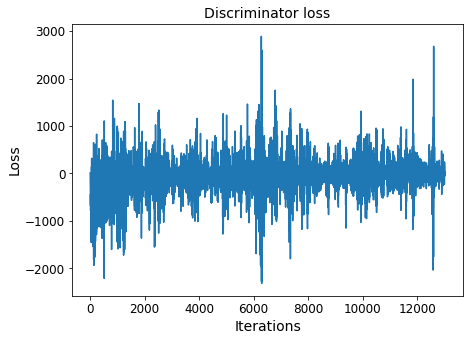

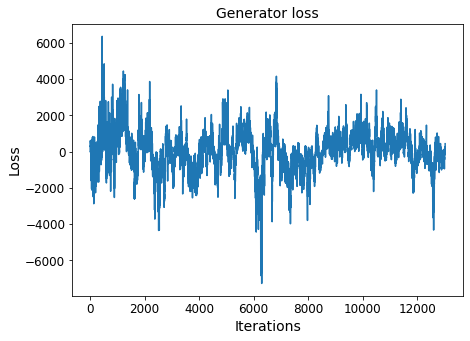

In [73]:
# ====
# your code
# choose these parameters (you have to train the model more than 20 epochs to get good results)
BATCH_SIZE = 32   # any adequate value
N_CHANNELS = 64   # > 32
N_EPOCHS = 25     # > 10
CRITIC_STEPS = 3 # > 2
GP_WEIGHT = 10    # > 5
LR = 3e-4           # < 1e-3
# ====

train_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

generator = ConvGenerator(n_channels=N_CHANNELS)
critic = ConvCritic(n_channels=N_CHANNELS)

train_losses = train_wgan(
    generator, 
    critic, 
    train_loader,
    critic_steps=CRITIC_STEPS, 
    batch_size=BATCH_SIZE, 
    n_epochs=N_EPOCHS,
    lr=LR,
    gp_weight=GP_WEIGHT,
    use_cuda=USE_CUDA
)

plot_losses(train_losses['discriminator_losses'], 'Discriminator loss')
plot_losses(train_losses['generator_losses'], 'Generator loss')

Let sample from our model and draw the samples.

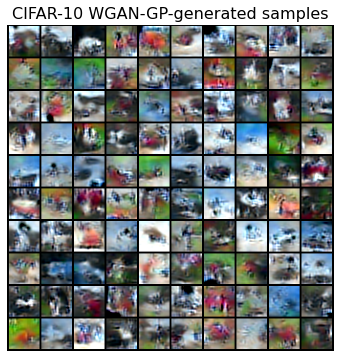

In [74]:
generator.eval()
critic.eval()
with torch.no_grad():
    samples = generator.sample(1000)
    samples = samples.cpu().detach().numpy()
    

show_samples(samples[:100], title='CIFAR-10 WGAN-GP-generated samples')

Какой-то прикол. Я добавила странный дропаут в архитектуру критика, и сэмплы стали намного более разнообразными. Остальные две модели лучше без этого дропаута. (Картинки остальных без него)

### Problem 3: SN-GAN on CIFAR10 (3pt)

[Spectral Normalization GAN](https://arxiv.org/pdf/1802.05957.pdf) replaces the weights in the critic $f(\mathbf{x}, \boldsymbol{\phi})$ by 
$$
    \mathbf{W}^{SN} = \frac{\mathbf{W}}{\|\mathbf{W}\|_2}.
$$

This ensures that $\| f\|_L \leq 1.$.

Power iteration method allows to efficiently compute $\| \mathbf{W} \|_2 = \sqrt{\lambda_{\text{max}}(\mathbf{W}^T \mathbf{W})}$.
    
The pseudocode of the method is:
* $\mathbf{u}_0$ -- random vector.
* for $k = 0, \dots, n - 1$: 
$$
    \mathbf{v}_{k+1} = \frac{\mathbf{W}^T \mathbf{u}_{k}}{\| \mathbf{W}^T \mathbf{u}_{k} \|}, \quad \mathbf{u}_{k+1} = \frac{\mathbf{W} \mathbf{v}_{k+1}}{\| \mathbf{W} \mathbf{v}_{k+1} \|}.
$$
* approximate the spectral norm
$$
    \| \mathbf{W} \|_2 = \sqrt{\lambda_{\text{max}}(\mathbf{W}^T \mathbf{W})} \approx \mathbf{u}_{n}^T \mathbf{W} \mathbf{v}_{n}.
$$

First step is to implement this method.

In [54]:
def power_iteration_method(W, n_iters, u_init=None, v_init=None):
    W = W.cuda()
    if u_init is None:
        u_init = nn.Parameter(torch.randn(W.shape[0]), requires_grad=False).cuda()
    if v_init is None:
        v_init = nn.Parameter(torch.randn(W.shape[1]), requires_grad=False).cuda()
    for i in range(n_iters):
        v_init = (W.T @ u_init / torch.sqrt(torch.sum(torch.square(W.T @ u_init)))).cuda()
        u_init = (W @ v_init / torch.sqrt(torch.sum(torch.square(W @ v_init)))).cuda()
    sigma = (u_init.T @ W @ v_init) 
    return sigma, u_init, v_init


def test_power_iteration_method():
    W = np.array([
        [1, 2, 3],
        [2, 3, 4],
        [3, 4, 5]
    ], dtype=np.float32)
    U, S, V = np.linalg.svd(W)
    W_tensor = torch.tensor(W)
    sigma, u, v = power_iteration_method(W_tensor, n_iters=20) # за 10 не всегда сходилось
    assert np.allclose(S[0], sigma.cpu())
    assert np.allclose(u.cpu(), U[:, 0])
    assert np.allclose(v.cpu(), V[0, :])


test_power_iteration_method()

Now we need to define layers with Spectral Normalization (we will use `SpectralNormConv2D` and `SpectralNormLinear` layers instead of standard `nn.Conv2D` and `nn.Linear` in our critic).

In [55]:
class SpectralNormConv2D(nn.Conv2d):
    def __init__(self, *args, **kwargs):
        self.power_iterations = kwargs.pop("power_iterations")
        super().__init__(*args, **kwargs)
        self.u = nn.Parameter(torch.randn(self.weight.shape[0]), requires_grad=False)
        self.v = nn.Parameter(torch.randn(self.weight.shape[1]), requires_grad=False)
        
    def forward(self, input):
        W = self.weight.view(self.weight.shape[0], -1)
        with torch.no_grad():
            # ====
            # your code
            # apply power iteration method
            # ====
            sigma, u, v = power_iteration_method(W, n_iters=self.power_iterations)
            #sigma = sigma.cuda()
            
        self.u.data = u.data
        self.v.data = v.data
        self.weight.data = self.weight.data / sigma
        
        return super().forward(input)


class SpectralNormLinear(nn.Linear):
    def __init__(self, *args, **kwargs):
        self.power_iterations = kwargs.pop("power_iterations")
        super().__init__(*args, **kwargs)
        
        self.u = nn.Parameter(torch.randn(self.weight.shape[0]), requires_grad=False)
        self.v = nn.Parameter(torch.randn(self.weight.shape[1]), requires_grad=False)
        
    def forward(self, input):
        W = self.weight.view(self.weight.shape[0], -1)
        with torch.no_grad():
            # ====
            # your code
            # apply power iteration method
            
            # ====
            sigma, u, v = power_iteration_method(W, n_iters=self.power_iterations)
        self.u.data = u.data
        self.v.data = v.data
        self.weight.data = self.weight.data / sigma
        
        return super().forward(input)

That is all :) 

We will use the same `ConvGenerator`, `ConvCritic` and `train_wgan()` as for WGAN model here.

Total number of epochs: 30


  0%|          | 0/30 [00:00<?, ?it/s]

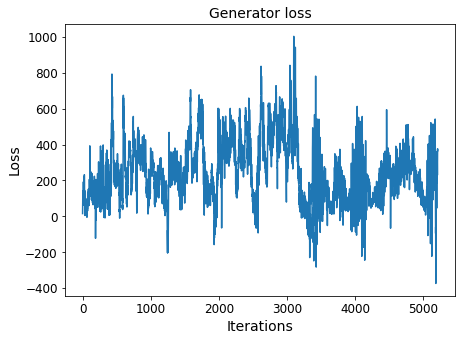

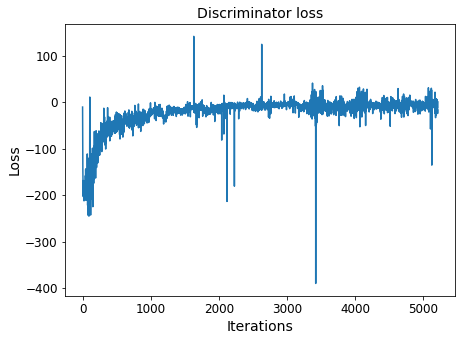

In [60]:
# ====
# your code
# choose these parameters
BATCH_SIZE = 32       # any adequate value
DIM = 64              # > 32
N_EPOCHS = 30         # > 20 
CRITIC_STEPS = 9     # 1 < x < 10
POWER_ITERATIONS = 4 # 1 < x < 5
LR = 3e-4               # < 1e-3
# ====

train_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
print('Total number of epochs:', N_EPOCHS)

generator = ConvGenerator(n_channels=DIM)
conv_layer = partial(SpectralNormConv2D, power_iterations=POWER_ITERATIONS)
linear_layer = partial(SpectralNormLinear, power_iterations=POWER_ITERATIONS)
critic = ConvCritic(n_channels=DIM, conv_layer=conv_layer, linear_layer=linear_layer)

train_losses = train_wgan(
    generator, 
    critic, 
    train_loader,
    critic_steps=CRITIC_STEPS, 
    batch_size=BATCH_SIZE, 
    n_epochs=N_EPOCHS,
    lr=LR,
    use_cuda=USE_CUDA
)

g_losses = train_losses['generator_losses']
d_losses = train_losses['discriminator_losses']

plot_losses(g_losses, 'Generator loss')
plot_losses(d_losses, 'Discriminator loss')

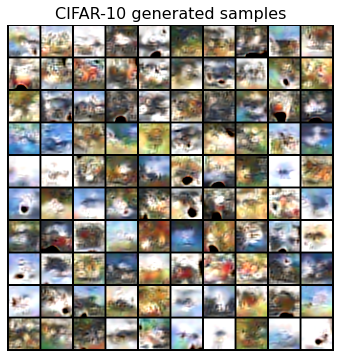

In [65]:
generator.eval()
critic.eval()
with torch.no_grad():
    samples = generator.sample(1000)
    samples = samples.cpu().detach().numpy()
    

show_samples(samples[:100], title='CIFAR-10 generated samples')

You are really welcome to experiment with combination of three approaches to get best samples :)